<a href="https://colab.research.google.com/github/abhi247ai/tensorflow_sessions/blob/main/Fashion_MNIST_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [30]:
#load data
fashion_mnist = keras.datasets.fashion_mnist

#split data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
train_images.shape    #60000 images , 28 * 28 pixels

(60000, 28, 28)

In [32]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [8]:
train_images[0,23,23]

194

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
#set label names

class_names =['T-Shirt/Top', 'Trousers', 'Pullover',' Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-Boot']

<function matplotlib.pyplot.show>

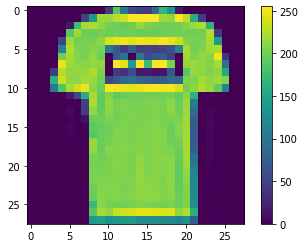

In [17]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show

In [18]:
# Date Preprocessing

#we will scale all scales values 0 - 255 to between 0 - 1.

train_images = train_images/255.0
test_images = train_images/255.0

In [19]:
train_images[0,23,23]   # changed from 194 to 0.76

0.7607843137254902

In [21]:
# Building the model
#will use 3 layers
%tensorflow_version 2.x


model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),  #input layer
                          keras.layers.Dense(128, activation='relu'),   #hidden layer
                          keras.layers.Dense(10, activation='softmax')  #output layer
                          ])

In [22]:
# compile the model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [23]:
# fit model

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5000 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3158 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [33]:
# test the model

# note we could use many thins in between like callbacks etc. but this is for practice only

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 74.1981 - accuracy: 0.8506
Test Accuracy:  0.850600004196167


In [ ]:
# the accuracy has been reduced from 90& to 85% : overfit case,
#beacause during epochs training data was momorizing the data labels, so on every epoch train data is not new to model
# but when we use test_images data it is completely unsee thus accuracy reduced

#we can perform some hyperparameter tuning like inc/dec epochs, changimg different acti.func., changing hidden neurons.

Pullover


<function matplotlib.pyplot.show>

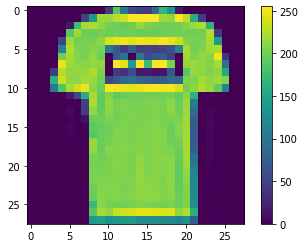

In [36]:
# let us also check predictions by passing test_images

predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])   
plt.figure()
plt.imshow(train_images[1])   # this line verifies the above print value
plt.colorbar()
plt.grid(False)
plt.show

Enter Number of the image: 452
Expected Image:  T-Shirt/Top
Guess:  Shirt


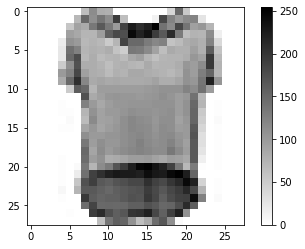

In [52]:
# instead we can write a script where we have to just put the number of image (from test data)

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-Shirt/Top', 'Trousers', 'Pullover',' Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-Boot']
  predictions = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(predictions)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap = plt.cm.binary)   
  #plt.title('Expected Image: '+ label)  #these two lines not working, therefore used below print statements
  #plt.xlabel("Guess: "+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show
  print('Expected Image: ', label)
  print("Guess: ", guess)

def get_number():
  while True:
    num = input("Enter Number of the image: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <=1000:
        return int(num)
      else:
        print('Not a valid number: Try again...')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

